In [2]:
import numpy as np
import pandas as pd
#from io import StringIO
import os
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
h = 8
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

#from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

h = 8
w = 8*1.61803398875

In [3]:
# Data the KB Curve is Based Upon
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/incident_impulse_error/kingery_1966_ii_re.csv"
filePath = os.path.join(working_dir, data_path)
re_data = pd.read_csv(filePath)

In [4]:
df = (re_data.assign(Data_Value=re_data['y-y0/y0'].abs())
       .groupby(['scaled_distance'])['y-y0/y0'].agg([('Min' , 'min'), ('Max', 'max')])
       .add_prefix('RE'))
df.head()

,REMin,REMax
scaled_distance,,
0.487,-0.004464,-0.004464
0.789,0.015658,0.015658
1.710,0.001037,0.001037
2.342,0.133158,0.133158
2.970,0.129568,0.179402


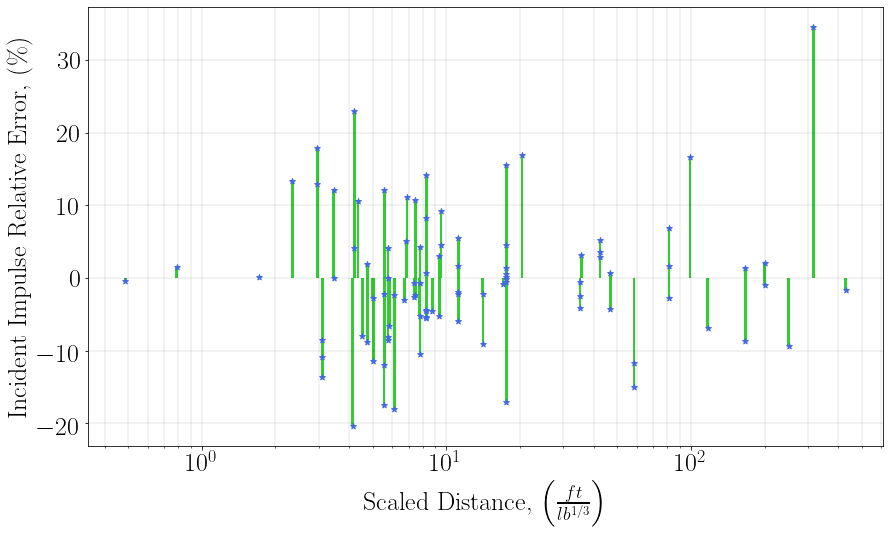

In [5]:
re_data.values
x = re_data.scaled_distance
#y = abs(re_data['y-y0/y0']*100)
y = re_data['y-y0/y0']*100

x1 = df.index
y_max = df.REMax*100
y_min = df.REMin*100

pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(w, h))

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=.1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.1)
#plt.ylim(0.01,10)
#plt.xlim(0.10,100)
c=0.025
ax.scatter(x,y,marker='*',color='royalblue',zorder=2)
ax.bar(x, y, width=c*np.array(x), color='limegreen',zorder=1)
ax.set_xscale("log")

plt.ylabel(r'Incident Impulse Relative Error, $\left(\%\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')
plt.tight_layout()
#ax.annotate('local max', xy=(3.2, 1.7), xytext=(4.1, 4.1),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

data_path = "5_reports/figures"
file_name = "fig_ii_re.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

In [6]:
rel_err = abs(re_data['y-y0/y0'][(re_data.scaled_distance > 1.0)&(re_data.scaled_distance < 3.0)]).mean()*100
print(u'The relative error of the arrival time between 1.0 < Z < 3.0 is \u00B1%2.2f%%.' % rel_err)

The relative error of the arrival time between 1.0 < Z < 3.0 is ±11.08%.
